# Analysis for Defects in GaN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Converging values with increasing cutoff

Done in the primitive cell at the PBE level. Relaxed with volume change then SCF. 

In [ ]:
# Cutoff energy in VASP
ENCUT = np.array([400,520,600,650])

# Total relaxed energy
Etot = np.array([-24.29584864, -24.30076274, -24.30368614, -24.30747166])

# Band gap
Egap = np.array([1.819593, 1.714369, 1.714394, ])

# Cell parameters
# There were no changes in the CONTCAR between 520-650 eV cutoff
a = np.array([3.20032, 3.21896, 3.21896, 3.21896])
c = np.array([5.20969, 5.24045, 5.24045, 5.24045])
u = np.array([1.96334, 1.97545, 1.97545, 1.97545])

## DOS and PDOS

Want to look at the fraction of the DOS localized on the different atoms.

First start with the primitive cell. Read the DOS and PDOS files.

In [31]:
file_path = f'GaN/primitive/TDOS.dat'
TDOS = np.loadtxt(file_path, skiprows=1)

file_path = f'GaN/primitive/PDOS_Ga.dat'
PDOS_Ga = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

file_path = f'GaN/primitive/PDOS_N.dat'
PDOS_N = np.loadtxt(file_path, skiprows=1, usecols=(0, -1))

Plot all of the data together.

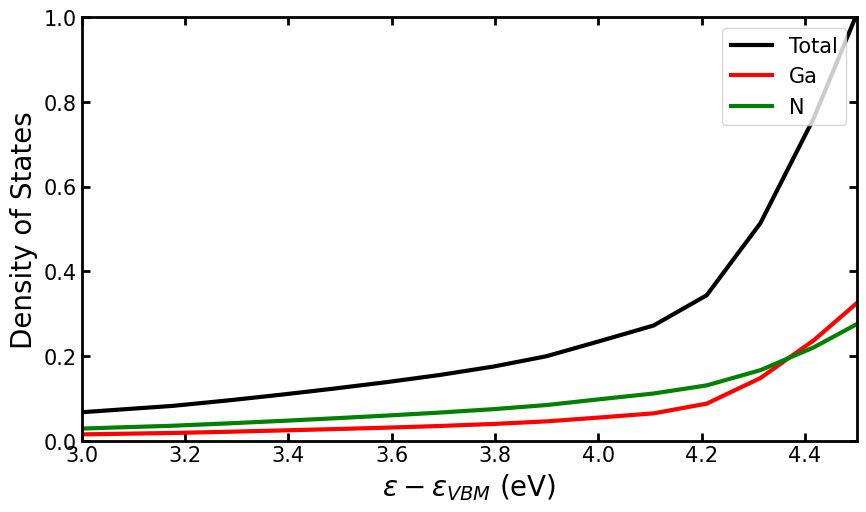

In [37]:
plt.figure(figsize=(10,5.5))

# Paper figure with smeared results
plt.plot(TDOS[:,0], TDOS[:,1], color='black', label='Total', linewidth=3)
plt.plot(PDOS_Ga[:,0], PDOS_Ga[:,1], color='red', label='Ga', linewidth=3)
plt.plot(PDOS_N[:,0], PDOS_N[:,1], color='green', label='N', linewidth=3)

# Labels
plt.xlabel('$\epsilon-\epsilon_{VBM}$ (eV)', fontsize=20)
plt.ylabel('Density of States', fontsize=20)

# Plot formatting
plt.legend(loc='upper right', fontsize=15)  # Move the legend to the top right and increase font size
plt.xticks(fontsize=15)  # Increase x-axis tick font size
plt.yticks(fontsize=15)  # Increase y-axis tick font size
plt.xlim(3,4.5)
plt.ylim(0,1)
ax = plt.gca()
ax.spines['top'].set_linewidth(2.0)   # Top border
ax.spines['right'].set_linewidth(2.0) # Right border
ax.spines['bottom'].set_linewidth(2.0)  # Bottom border (default width)
ax.spines['left'].set_linewidth(2.0)    # Left border (default width)
ax.tick_params(axis='both',  # Apply to both x and y axes
               which='both',  # Apply to both major and minor ticks
               direction='in',  # Tick direction (inward and outward)
               width=2,  # Thickness of the tick marks
               length=6, # Length of the tick marks
               bottom=True, top=True, left=True, right=True)  
plt.show()

It looks like the conduction-band states are mostly localized on the Ga atoms, except at the very bottom of the conduction band. Xiaoguang says that we may get a slight $\Delta q$ with transitions across the inflection point around 4.3 eV, but we will likely need the defect to break the symmetry.

## Formation Energy

Want to see if I match the previously-reported results for formation energies. The chemical potentials are related by $$\mu_{\text{Ga}} + \mu_{\text{N}} = \mu_{\text{GaN}}^\text{bulk}$$

First set the chemical potentials.

In [2]:
Etot_Ga = -23.23457243 # 8 atoms
Etot_N2 = -16.63527354 # 2 atoms in ~10x10x10 A cell

Etot_perf = -2184.16494904 # 180 pairs

mu_GaN = Etot_perf/180

In [15]:
Etot_N = -3.12406489
Ebind_N2 = Etot_N2 - 2*Etot_N
Ebind_N2

-10.38714376

In [16]:
Etot_N2 = Etot_N2 - Ebind_N2 - 9.91

### N Antisite
 
For the N antisite, I originally calculated many different combinations of supercell size, k-point mesh, and geometry for the formation energies. Based on discussion with Sok, we do not need to be worried about reproducing previous results exactly, as long as we are within about 0.5 eV. The results below are for the 5x3x3 supercell with a $\Gamma$-only k-point mesh and the bond closer to along the $b$ direction. 

In [17]:
Etot_defect = -2182.24869595 

For Ga-rich conditions, set the Ga chemical potential to that of Ga a bulk Ga crystal.

In [18]:
mu_Ga = Etot_Ga/8
mu_N = mu_GaN - mu_Ga

Etot_defect - Etot_perf + mu_Ga - mu_N

8.241859699388716

For N-rich conditions, set the N chemical potential to that of N in an N$_2$ molecule.

In [19]:
mu_N = Etot_N2/2
mu_Ga = mu_GaN - mu_N

Etot_defect - Etot_perf + mu_Ga - mu_N

5.9401331531109385

### $\text{O}_{\text{N}}$ Substitutional Defect

I found that (according to [this supplemental information page](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwihuo-38uKDAxU6D1kFHRY0BzIQFnoECA0QAw&url=https%3A%2F%2Fwww.rsc.org%2Fsuppdata%2Fc6%2Fcp%2Fc6cp05073e%2Fc6cp05073e1.pdf&usg=AOvVaw2SfEkoYsaFBDkmEWYf-urx&opi=89978449)) GGA is known to overestimate the O$_2$ binding energy by "even more than 1.5 eV." They cite the O$_2$ binding energy as 5.12 eV. I will follow the same procedure they use to correct the total energy to match the experimental binding energy.

In [20]:
Etot_O = -1.52842721
Etot_O2 = -9.85963727

Ebind_O2 = Etot_O2 - 2*Etot_O
Ebind_O2

-6.80278285

In [21]:
Etot_O2 = Etot_O2 - Ebind_O2 - 5.12
Etot_O2

-8.176854420000002

In [25]:
Etot_Ga2O3 = -111.99556322 # 8 Ga and 12 O

In [26]:
#mu_O = Etot_O2/2

Etot_defect = -2182.25614162

For Ga-rich conditions, set the Ga chemical potential to that of Ga a bulk Ga crystal.

In [27]:
mu_Ga = Etot_Ga/8
mu_N = mu_GaN - mu_Ga
mu_O = (Etot_Ga2O3/4 - 2*mu_Ga)/3

Etot_defect - Etot_perf + mu_N - mu_O

0.07562848936101396

For N-rich conditions, set the N chemical potential to that of N in an N$_2$ molecule.

In [28]:
mu_N = Etot_N2/2
mu_Ga = mu_GaN - mu_N
mu_O = (Etot_Ga2O3/4 - 2*mu_Ga)/3

Etot_defect - Etot_perf + mu_N - mu_O

0.45924958040731045

In [19]:
Etot_defect - Etot_perf - mu_O

5.997234639999798

In [35]:
mu_Ga

-3.816612946944444

In [20]:
mu_N

-8.31763677

In [29]:
mu_O

-6.629507050407407